In [1]:
import Pkg; Pkg.activate(@__DIR__); Pkg.add("PyPlot"); Pkg.add("ForwardDiff"); Pkg.instantiate()

  Activating project at `/workspaces/lecture-notebooks/Lecture 7`
   Resolving package versions...
    Updating `/workspaces/lecture-notebooks/Lecture 7/Project.toml`
  [d330b81b] + PyPlot v2.11.6
    Updating `/workspaces/lecture-notebooks/Lecture 7/Manifest.toml`
  [3da002f7] + ColorTypes v0.12.1
  [5ae59095] + Colors v0.13.1
  [8f4d0f93] + Conda v1.10.2
  [53c48c17] + FixedPointNumbers v0.8.5
  [682c06a0] + JSON v0.21.4
  [b964fa9f] + LaTeXStrings v1.4.0
  [1914dd2f] + MacroTools v0.5.16
  [69de0a69] + Parsers v2.8.3
⌅ [aea7be01] + PrecompileTools v1.2.1
  [21216c6a] + Preferences v1.5.0
  [438e738f] + PyCall v1.96.4
  [d330b81b] + PyPlot v2.11.6
  [189a3867] + Reexport v1.2.2
  [81def892] + VersionParsing v1.3.0
  [0dad84c5] + ArgTools v1.1.1
  [56f22d72] + Artifacts
  [2a0f44e3] + Base64
  [ade2ca70] + Dates
  [f43a241f] + Downloads v1.6.0
  [7b1f6079] + FileWatching
  [b77e0a4c] + InteractiveUtils
  [b27032c2] + LibCURL v0.6.4
  [8f399da3] + Libdl
  [37e2e46d] + LinearAlgebra
  [

In [2]:
using LinearAlgebra
using PyPlot

In [3]:
# Discrete dynamics
h = 0.1   # time step
A = [1 h; 0 1]
B = [0.5*h*h; h]

2-element Vector{Float64}:
 0.005000000000000001
 0.1

In [15]:
n = 2     # number of state
m = 1     # number of controls
Tfinal = 20.0 # final time #try larger values
N = Int(Tfinal/h)+1    # number of time steps
thist = Array(range(0,h*(N-1), step=h));

In [16]:
# Initial conditions
x0 = [1.0; 0]

2-element Vector{Float64}:
 1.0
 0.0

In [6]:
# Cost weights
Q = 1.0*I(2)
R = 0.1
Qn = 1.0*I(2)

2×2 Diagonal{Float64, Vector{Float64}}:
 1.0   ⋅ 
  ⋅   1.0

In [7]:
function J(xhist,uhist)
    cost = 0.5*xhist[:,end]'*Qn*xhist[:,end]
    for k = 1:(N-1)
        cost = cost + 0.5*xhist[:,k]'*Q*xhist[:,k] + 0.5*uhist[k]'*R*uhist[k]
    end
    return cost
end

J (generic function with 1 method)

In [8]:
function rollout(xhist, uhist)
    xnew = zeros(size(xhist))
    xnew[:,1] = xhist[:,1]
    for k = 1:(N-1)
        xnew[:,k+1] .= A*xnew[:,k] + B*uhist[k]
    end
    return xnew
end

rollout (generic function with 1 method)

In [17]:
# Initial guess
xhist = repeat(x0, 1, N)
uhist = zeros(N-1)
Δu = ones(N-1)
λhist = zeros(n,N)

xhist = rollout(xhist, uhist) #initial rollout to get state trajectory

J(xhist,uhist) #Initial cost

100.5

In [23]:
b = 1e-2 #line search tolerance
α = 1.0
iter = 0
J_hist = Float64[]

while maximum(abs.(Δu[:])) > 1e-2 #terminate when the gradient is small
    
    #Backward pass to compute λ and Δu
    λhist[:,N] .= Qn*xhist[:,N]
    for k = N-1:-1:1
        Δu[k] = -(uhist[k]+R\B'*λhist[:,k+1])
        λhist[:,k] .= Q*xhist[:,k] + A'*λhist[:,k+1]
    end
    
    #Forward pass with line search to compute x
    α = 1.0
    unew = uhist + α.*Δu
    xnew = rollout(xhist, unew)
    while J(xnew, unew) > J(xhist, uhist) - b*α*Δu[:]'*Δu[:]
        α = 0.5*α
        unew = uhist + α.*Δu
        xnew = rollout(xhist, unew)
    end
    uhist .= unew;
    xhist .= xnew;
    iter += 1
    if iter % 20 == 0
        push!(J_hist, J(xhist, uhist))
    end
end

LoadError: InterruptException:

In [24]:
iter

6550

In [20]:
J(xhist,uhist) #cost of solution

6.65885168077714

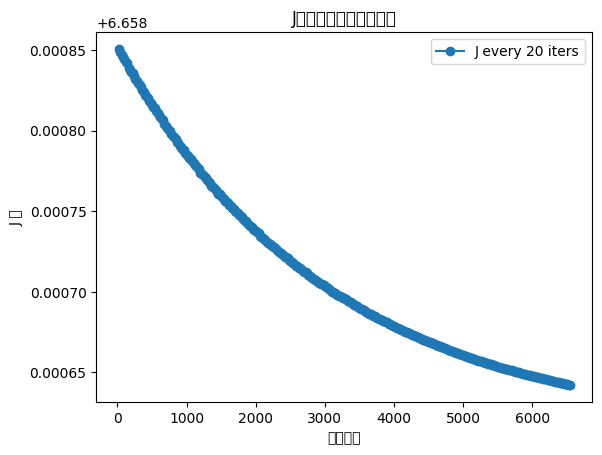

sys:1: UserWarning: Glyph 20540 (\N{CJK UNIFIED IDEOGRAPH-503C}) missing from font(s) DejaVu Sans.
sys:1: UserWarning: Glyph 38543 (\N{CJK UNIFIED IDEOGRAPH-968F}) missing from font(s) DejaVu Sans.
sys:1: UserWarning: Glyph 36845 (\N{CJK UNIFIED IDEOGRAPH-8FED}) missing from font(s) DejaVu Sans.
sys:1: UserWarning: Glyph 20195 (\N{CJK UNIFIED IDEOGRAPH-4EE3}) missing from font(s) DejaVu Sans.
sys:1: UserWarning: Glyph 27425 (\N{CJK UNIFIED IDEOGRAPH-6B21}) missing from font(s) DejaVu Sans.
sys:1: UserWarning: Glyph 25968 (\N{CJK UNIFIED IDEOGRAPH-6570}) missing from font(s) DejaVu Sans.
sys:1: UserWarning: Glyph 30340 (\N{CJK UNIFIED IDEOGRAPH-7684}) missing from font(s) DejaVu Sans.
sys:1: UserWarning: Glyph 21464 (\N{CJK UNIFIED IDEOGRAPH-53D8}) missing from font(s) DejaVu Sans.
sys:1: UserWarning: Glyph 21270 (\N{CJK UNIFIED IDEOGRAPH-5316}) missing from font(s) DejaVu Sans.
sys:1: UserWarning: Glyph 36807 (\N{CJK UNIFIED IDEOGRAPH-8FC7}) missing from font(s) DejaVu Sans.
sys:1: Use

PyObject <matplotlib.legend.Legend object at 0x76c5da902270>

In [25]:
# 绘制每20次迭代的J变化过程
plot(20:20:20*length(J_hist), J_hist, marker="o", label="J every 20 iters")
xlabel("迭代次数")
ylabel("J 值")
title("J随迭代次数的变化过程")
legend()

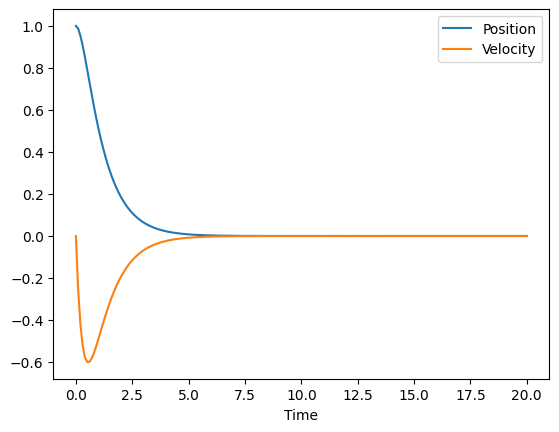

PyObject <matplotlib.legend.Legend object at 0x76c5daa06c00>

In [21]:
# Plot x1 vs. x2, u vs. t, x vs. t, etc.
plot(thist,xhist[1,:], label="Position")
plot(thist,xhist[2,:], label="Velocity")
xlabel("Time")
legend()

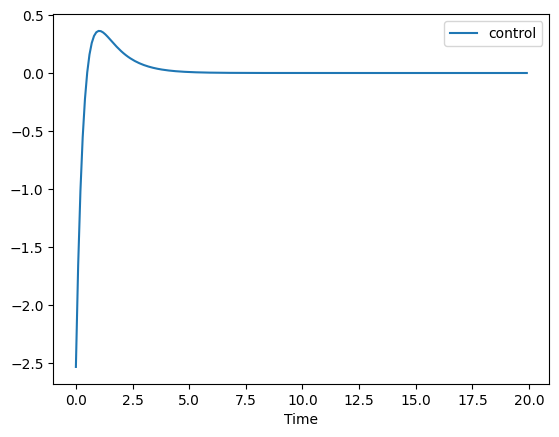

PyObject <matplotlib.legend.Legend object at 0x76c5daa5ae10>

In [22]:
plot(thist[1:end-1], uhist, label="control")
xlabel("Time")
legend()